In [ ]:
pip install PyPortfolioOpt


     |████████████████████████████████| 61 kB 5.3 MB/s 
     |████████████████████████████████| 2.8 MB 17.3 MB/s 
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import yfinance as yf

from matplotlib import style
from matplotlib import rcParams

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns , plotting

In [ ]:
# Import 11 ETFs

In [ ]:
# 11 Select SPDRs
keys= ['XLF', 'XLU', 'XLRE', 'XLE', 'XLB', 'XLI', 'XLK', 'XTL', 'XLP', 'XLY', 'XLV']

spdr_data = pd.DataFrame()

for key in keys:
    spdr_data[key] = yf.download(key, start="2019-01-01", end="2019-12-31")['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
from itertools import combinations
perm = combinations(keys, 3)

In [ ]:
#Determine the EF under no constraints as in 4.2 again

In [ ]:
eff = []
weights = []
pf_list = []
# Print the obtained permutations
for comb in list(perm):
    print (comb)
    pf_list.append(comb)
    data_3 = pd.DataFrame()
    for key in comb:
        data_3[key] = spdr_data[key]
        
        
    #expected returns and sample covariance
    mu = expected_returns.mean_historical_return(data_3)
    S = risk_models.sample_cov(data_3)

    #Sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(-1,1))
    weights.append(ef.max_sharpe())
    eff.append(ef.portfolio_performance(verbose=True))

('XLF', 'XLU', 'XLRE')
Expected annual return: 26.1%
Annual volatility: 9.3%
Sharpe Ratio: 2.59
('XLF', 'XLU', 'XLE')
Expected annual return: 35.6%
Annual volatility: 12.0%
Sharpe Ratio: 2.79
('XLF', 'XLU', 'XLB')
Expected annual return: 26.2%
Annual volatility: 9.8%
Sharpe Ratio: 2.48
('XLF', 'XLU', 'XLI')
Expected annual return: 25.4%
Annual volatility: 9.4%
Sharpe Ratio: 2.48
('XLF', 'XLU', 'XLK')
Expected annual return: 36.2%
Annual volatility: 11.5%
Sharpe Ratio: 2.98
('XLF', 'XLU', 'XTL')
Expected annual return: 32.7%
Annual volatility: 11.1%
Sharpe Ratio: 2.77
('XLF', 'XLU', 'XLP')
Expected annual return: 25.3%
Annual volatility: 9.3%
Sharpe Ratio: 2.52
('XLF', 'XLU', 'XLY')
Expected annual return: 25.3%
Annual volatility: 9.4%
Sharpe Ratio: 2.49
('XLF', 'XLU', 'XLV')
Expected annual return: 26.3%
Annual volatility: 9.8%
Sharpe Ratio: 2.49
('XLF', 'XLRE', 'XLE')
Expected annual return: 39.8%
Annual volatility: 13.5%
Sharpe Ratio: 2.79
('XLF', 'XLRE', 'XLB')
Expected annual retur

In [ ]:
weights = pd.DataFrame(weights)
weights.head()

,XLF,XLU,XLRE,XLE,XLB,XLI,XLK,XTL,XLP,XLY,XLV
0,0.323356,0.388566,0.288078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.746610,0.646229,NaN,-0.392839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.465296,0.643625,NaN,NaN,-0.108921,NaN,NaN,NaN,NaN,NaN,NaN
3,0.305367,0.612734,NaN,NaN,NaN,0.081899,NaN,NaN,NaN,NaN,NaN
4,-0.061906,0.539713,NaN,NaN,NaN,NaN,0.522193,NaN,NaN,NaN,NaN


In [ ]:
port_short = pd.DataFrame(pf_list)
eff = pd.DataFrame(eff)
port_short['exp_return_19'] = eff[0]
port_short['volatility_19'] = eff[1]
port_short['Sharpe Ratio_19'] = eff[2]
port_short
port_short['rank']= port_short['exp_return_19'].rank(method='max', ascending = True)
port_short

,0,1,2,exp_return_19,volatility_19,Sharpe Ratio_19,rank
0,XLF,XLU,XLRE,0.261454,0.093169,2.591563,46.0
1,XLF,XLU,XLE,0.355558,0.120263,2.790214,105.0
2,XLF,XLU,XLB,0.262443,0.097565,2.484943,48.0
3,XLF,XLU,XLI,0.253760,0.094435,2.475342,30.0
4,XLF,XLU,XLK,0.361675,0.114613,2.981107,108.0
...,...,...,...,...,...,...,...
160,XLK,XLY,XLV,0.473309,0.179323,2.527888,133.0
161,XTL,XLP,XLY,0.333592,0.125214,2.504440,92.0
162,XTL,XLP,XLV,0.277251,0.113492,2.266681,68.0
163,XTL,XLY,XLV,0.322305,0.142451,2.122176,90.0


In [ ]:
idxmax = port_short['rank'].idxmax()
port_short.iloc[idxmax]

0                       XLF
1                       XLE
2                       XLK
exp_return_19       0.70371
volatility_19      0.221128
Sharpe Ratio_19     3.09191
rank                    165
Name: 19, dtype: object

In [ ]:
idxmin = port_short['rank'].idxmin()
port_short.iloc[idxmin]


0                       XLE
1                       XTL
2                       XLV
exp_return_19      0.213044
volatility_19      0.141933
Sharpe Ratio_19     1.36011
rank                      1
Name: 126, dtype: object

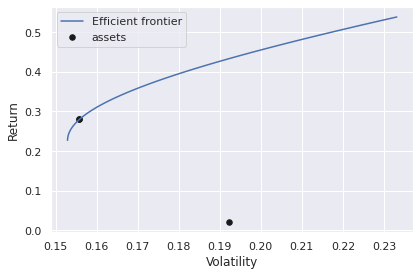

In [ ]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(spdr_data[['XLF', 'XLE', 'XLF']])
S = risk_models.sample_cov(spdr_data[['XLF', 'XLE', 'XLF']])

ef = EfficientFrontier(mu, S, weight_bounds=(-1, 1))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [ ]:
#Determine the EF under long only constraints

In [ ]:
# Get all permutations of length 3
perm = combinations(keys, 3)
## weight_bounds=(0,1) - Long positions

eff = []
weights = []
pf_list = []
# Print the obtained permutations
for comb in list(perm):
    print (comb)
    pf_list.append(comb)
    data_3 = pd.DataFrame()
    for key in comb:
        data_3[key] = spdr_data[key]
        
        
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(data_3)
    S = risk_models.sample_cov(data_3)

    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0,1))
    weights.append(ef.max_sharpe())
    eff.append(ef.portfolio_performance(verbose=True))

('XLF', 'XLU', 'XLRE')
Expected annual return: 26.1%
Annual volatility: 9.3%
Sharpe Ratio: 2.59
('XLF', 'XLU', 'XLE')
Expected annual return: 25.5%
Annual volatility: 9.5%
Sharpe Ratio: 2.47
('XLF', 'XLU', 'XLB')
Expected annual return: 25.5%
Annual volatility: 9.5%
Sharpe Ratio: 2.47
('XLF', 'XLU', 'XLI')
Expected annual return: 25.4%
Annual volatility: 9.4%
Sharpe Ratio: 2.48
('XLF', 'XLU', 'XLK')
Expected annual return: 35.2%
Annual volatility: 11.2%
Sharpe Ratio: 2.98
('XLF', 'XLU', 'XTL')
Expected annual return: 25.5%
Annual volatility: 9.5%
Sharpe Ratio: 2.47
('XLF', 'XLU', 'XLP')
Expected annual return: 25.3%
Annual volatility: 9.3%
Sharpe Ratio: 2.52
('XLF', 'XLU', 'XLY')
Expected annual return: 25.3%
Annual volatility: 9.4%
Sharpe Ratio: 2.49
('XLF', 'XLU', 'XLV')
Expected annual return: 25.5%
Annual volatility: 9.5%
Sharpe Ratio: 2.47
('XLF', 'XLRE', 'XLE')
Expected annual return: 27.4%
Annual volatility: 10.6%
Sharpe Ratio: 2.40
('XLF', 'XLRE', 'XLB')
Expected annual return:

In [ ]:
weights_long = pd.DataFrame(weights)
weights_long.head()

,XLF,XLU,XLRE,XLE,XLB,XLI,XLK,XTL,XLP,XLY,XLV
0,0.323356,0.388566,0.288078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.376936,0.623064,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.376936,0.623064,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.305367,0.612734,NaN,NaN,NaN,0.081899,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.528953,NaN,NaN,NaN,NaN,0.471047,NaN,NaN,NaN,NaN


In [ ]:
port_long = pd.DataFrame(pf_list)
eff = pd.DataFrame(eff)
port_long['exp_return_19'] = eff[0]
port_long['volatility_19'] = eff[1]
port_long['Sharpe Ratio_19'] = eff[2]
port_long
port_long['rank']= port_long['exp_return_19'].rank(method='max', ascending = True)
port_long

,0,1,2,exp_return_19,volatility_19,Sharpe Ratio_19,rank
0,XLF,XLU,XLRE,0.261454,0.093169,2.591563,90.0
1,XLF,XLU,XLE,0.254842,0.095160,2.467868,66.0
2,XLF,XLU,XLB,0.254842,0.095160,2.467868,66.0
3,XLF,XLU,XLI,0.253760,0.094435,2.475342,57.0
4,XLF,XLU,XLK,0.351968,0.111543,2.976150,129.0
...,...,...,...,...,...,...,...
160,XLK,XLY,XLV,0.477971,0.181360,2.525210,158.0
161,XTL,XLP,XLY,0.250699,0.105711,2.182346,45.0
162,XTL,XLP,XLV,0.244043,0.105485,2.123941,22.0
163,XTL,XLY,XLV,0.243821,0.131164,1.706424,19.0


In [ ]:
idxmax = port_long['rank'].idxmax()
port_long.iloc[idxmax]

0                       XLF
1                       XLE
2                       XLK
exp_return_19      0.477972
volatility_19       0.18136
Sharpe Ratio_19     2.52521
rank                    165
Name: 19, dtype: object

In [ ]:
weights_long.iloc[idxmax]


XLF     0.000001
XLU          NaN
XLRE         NaN
XLE    -0.000001
XLB          NaN
XLI          NaN
XLK     1.000000
XTL          NaN
XLP          NaN
XLY          NaN
XLV          NaN
Name: 19, dtype: float64

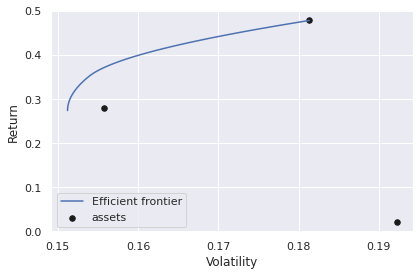

In [ ]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(spdr_data[['XLF', 'XLE', 'XLK']])
S = risk_models.sample_cov(spdr_data[['XLF', 'XLE', 'XLK']])

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [ ]:
# Determine the EF under box constraints of minimum weight of 10%, and maximum weight of 40%. (The later limit concentration risk)

In [ ]:
# Get all permutations of length 3
perm = combinations(keys, 3)
## weight_bounds=(0.1,0.4) - Box constraints

eff = []
weights = []
pf_list = []
# Print the obtained permutations
for comb in list(perm):
    print (comb)
    pf_list.append(comb)
    data_3 = pd.DataFrame()
    for key in comb:
        data_3[key] = spdr_data[key]
        
        
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(data_3)
    S = risk_models.sample_cov(data_3)

    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S, weight_bounds=(0.1,0.4))
    weights.append(ef.max_sharpe())
    eff.append(ef.portfolio_performance(verbose=True))

('XLF', 'XLU', 'XLRE')
Expected annual return: 26.1%
Annual volatility: 9.3%
Sharpe Ratio: 2.59
('XLF', 'XLU', 'XLE')
Expected annual return: 21.2%
Annual volatility: 10.5%
Sharpe Ratio: 1.83
('XLF', 'XLU', 'XLB')
Expected annual return: 24.8%
Annual volatility: 10.3%
Sharpe Ratio: 2.21
('XLF', 'XLU', 'XLI')
Expected annual return: 26.0%
Annual volatility: 10.4%
Sharpe Ratio: 2.31
('XLF', 'XLU', 'XLK')
Expected annual return: 34.3%
Annual volatility: 11.3%
Sharpe Ratio: 2.86
('XLF', 'XLU', 'XTL')
Expected annual return: 22.8%
Annual volatility: 10.5%
Sharpe Ratio: 1.97
('XLF', 'XLU', 'XLP')
Expected annual return: 25.4%
Annual volatility: 9.3%
Sharpe Ratio: 2.51
('XLF', 'XLU', 'XLY')
Expected annual return: 25.7%
Annual volatility: 10.0%
Sharpe Ratio: 2.37
('XLF', 'XLU', 'XLV')
Expected annual return: 24.7%
Annual volatility: 10.0%
Sharpe Ratio: 2.28
('XLF', 'XLRE', 'XLE')
Expected annual return: 22.4%
Annual volatility: 11.2%
Sharpe Ratio: 1.83
('XLF', 'XLRE', 'XLB')
Expected annual r

In [ ]:
weights_box = pd.DataFrame(weights)
weights_box.head()

,XLF,XLU,XLRE,XLE,XLB,XLI,XLK,XTL,XLP,XLY,XLV
0,0.323356,0.388566,0.288078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.400000,0.400000,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.400000,0.400000,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN
3,0.400000,0.400000,NaN,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN
4,0.200000,0.400000,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN


In [ ]:
port_box = pd.DataFrame(pf_list)
eff = pd.DataFrame(eff)
port_box['exp_return_19'] = eff[0]
port_box['volatility_19'] = eff[1]
port_box['Sharpe Ratio_19'] = eff[2]
port_box
port_box['rank']= port_box['exp_return_19'].rank(method='max', ascending = True)
port_box

,0,1,2,exp_return_19,volatility_19,Sharpe Ratio_19,rank
0,XLF,XLU,XLRE,0.261454,0.093169,2.591563,115.0
1,XLF,XLU,XLE,0.212019,0.104687,1.834216,42.0
2,XLF,XLU,XLB,0.248298,0.103090,2.214555,91.0
3,XLF,XLU,XLI,0.260115,0.104154,2.305400,112.0
4,XLF,XLU,XLK,0.343047,0.113131,2.855502,156.0
...,...,...,...,...,...,...,...
160,XLK,XLY,XLV,0.333146,0.143975,2.175012,144.0
161,XTL,XLP,XLY,0.222243,0.116015,1.743251,55.0
162,XTL,XLP,XLV,0.197115,0.110314,1.605549,25.0
163,XTL,XLY,XLV,0.200742,0.128235,1.409458,28.0


In [ ]:
idxmax = port_box['rank'].idxmax()
port_box.iloc[idxmax]

0                      XLF
1                      XLI
2                      XLK
exp_return_19       0.3554
volatility_19      0.15326
Sharpe Ratio_19    2.18843
rank                   165
Name: 30, dtype: object

In [ ]:
weights_box.iloc[idxmax]


XLF     0.4
XLU     NaN
XLRE    NaN
XLE     NaN
XLB     NaN
XLI     0.2
XLK     0.4
XTL     NaN
XLP     NaN
XLY     NaN
XLV     NaN
Name: 30, dtype: float64

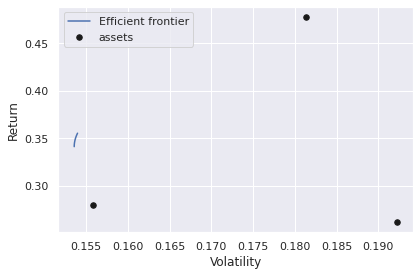

In [ ]:
# Calculate expected returns and sample covariance
mu = expected_returns.mean_historical_return(spdr_data[['XLF', 'XLI', 'XLK']])
S = risk_models.sample_cov(spdr_data[['XLF', 'XLE', 'XLK']])

ef = EfficientFrontier(mu, S, weight_bounds=(0.2, 0.4))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.show()

In [ ]:
#Discuss the impacts on the EF under constraints in detail. Comment on capital requirements and fiduciary responsibilities associated with these constraints.

With a box limitation of maximum 0.4 and minimum 0.2, a single security cannot account for more than 40% of total portfolio value and cannot account for less than 20% of total value. We can observe that for best optimization with Short and Long constraints, the largest weight goes to XLK, which is not well balanced. This demonstrates that optimising without constraints increases the risk of achieving a better return with the most profitable stock rather than diversifying the portfolio to lower risk.
Furthermore, using constraints would show the manager's lack of bias toward a particular security, increasing investor confidence and encouraging increased capital input from clients.